# Metrik Evaluasi dalam Machine Learning

Dalam machine learning, memilih dan menggunakan metrik evaluasi yang tepat sangat penting untuk:
1. Mengukur performa model
2. Membandingkan berbagai model
3. Melakukan fine-tuning
4. Mendeteksi overfitting/underfitting

Kita akan membahas beberapa metrik evaluasi utama untuk:
- Klasifikasi
- Regresi
- Clustering

Mari kita mulai dengan import library yang diperlukan dan menyiapkan data contoh.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_regression, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    mean_squared_error, mean_absolute_error, r2_score,
    silhouette_score, calinski_harabasz_score
)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import KMeans

# Set random seed for reproducibility
np.random.seed(42)

# 1. Metrik Evaluasi untuk Klasifikasi

Mari kita mulai dengan metrik evaluasi untuk masalah klasifikasi. Kita akan menggunakan dataset sintetis untuk mendemonstrasikan berbagai metrik evaluasi.

Metrik yang akan kita bahas:
1. Accuracy
2. Precision
3. Recall
4. F1-Score
5. Confusion Matrix
6. Classification Report

In [65]:
# Membuat dataset klasifikasi sintetis
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_classes=2,
    n_clusters_per_class=2,
    random_state=42
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Hitung berbagai metrik
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Metrik Evaluasi Klasifikasi:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Metrik Evaluasi Klasifikasi:
Accuracy: 0.8550
Precision: 0.9149
Recall: 0.8037
F1-Score: 0.8557

Confusion Matrix:
[[85  8]
 [21 86]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



# Visualisasi Confusion Matrix

Confusion Matrix adalah salah satu tool yang sangat penting dalam evaluasi model klasifikasi. Mari kita visualisasikan confusion matrix menggunakan heatmap untuk pemahaman yang lebih baik.

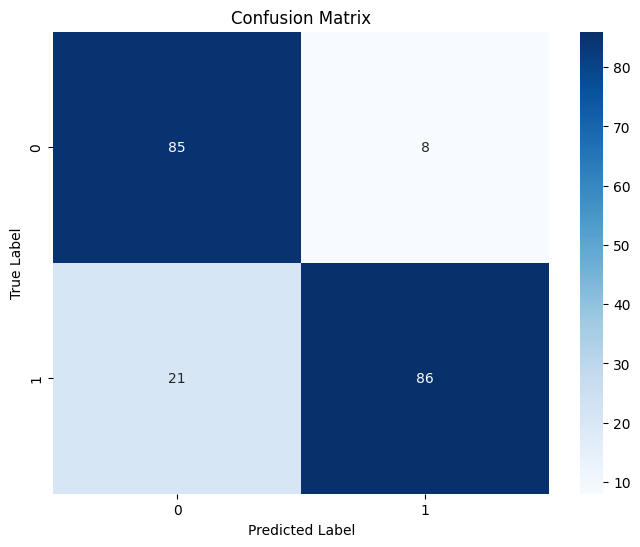


Penjelasan Metrik:
1. Accuracy: Proporsi prediksi yang benar dari total prediksi
2. Precision: Proporsi prediksi positif yang benar dari total prediksi positif
3. Recall: Proporsi kasus positif yang berhasil diprediksi dari total kasus positif sebenarnya
4. F1-Score: Rata-rata harmonik dari precision dan recall


In [66]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Penjelasan metrik
print("\nPenjelasan Metrik:")
print("1. Accuracy: Proporsi prediksi yang benar dari total prediksi")
print("2. Precision: Proporsi prediksi positif yang benar dari total prediksi positif")
print("3. Recall: Proporsi kasus positif yang berhasil diprediksi dari total kasus positif sebenarnya")
print("4. F1-Score: Rata-rata harmonik dari precision dan recall")

# 2. Metrik Evaluasi untuk Regresi

Untuk masalah regresi, kita menggunakan metrik yang berbeda karena output-nya berupa nilai kontinu. Mari kita bahas beberapa metrik evaluasi utama untuk regresi:

1. Mean Squared Error (MSE)
2. Root Mean Squared Error (RMSE)
3. Mean Absolute Error (MAE)
4. R-squared (R²) Score

Metrik Evaluasi Regresi:
Mean Squared Error (MSE): 0.0095
Root Mean Squared Error (RMSE): 0.0975
Mean Absolute Error (MAE): 0.0777
R-squared Score (R²): 1.0000


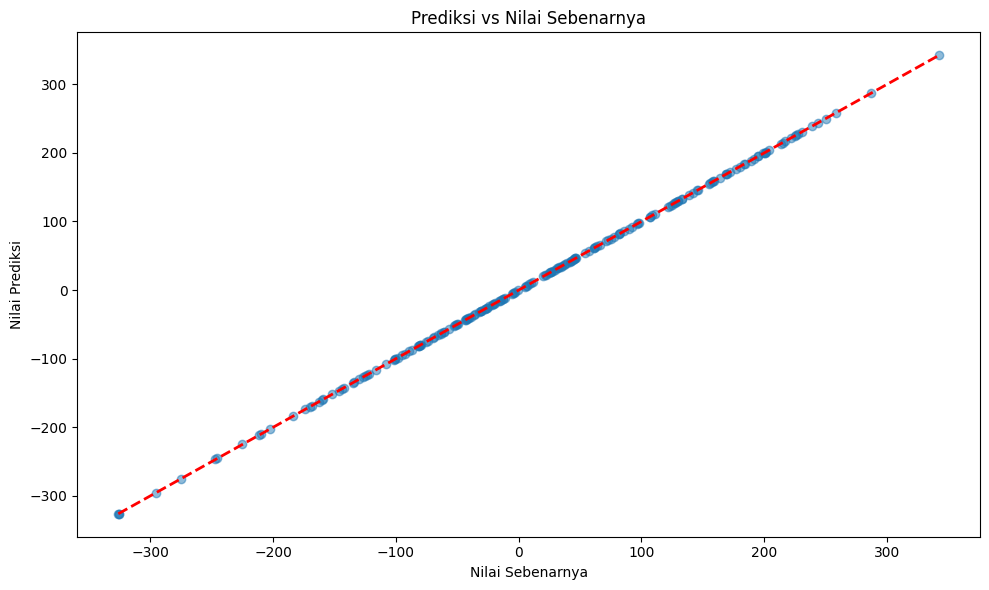

In [67]:
# Membuat dataset regresi sintetis
X_reg, y_reg = make_regression(
    n_samples=1000,
    n_features=10,
    noise=0.1,
    random_state=42
)

# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Train model
reg = LinearRegression()
reg.fit(X_train_reg, y_train_reg)

# Predictions
y_pred_reg = reg.predict(X_test_reg)

# Hitung metrik
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("Metrik Evaluasi Regresi:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared Score (R²): {r2:.4f}")

# Visualisasi hasil prediksi vs nilai sebenarnya
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], 
         [y_test_reg.min(), y_test_reg.max()], 
         'r--', lw=2)
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')
plt.title('Prediksi vs Nilai Sebenarnya')
plt.tight_layout()
plt.show()

# Penjelasan Metrik Regresi

1. **Mean Squared Error (MSE)**
   - Rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya
   - Memberikan bobot lebih besar pada error yang besar
   - Satuan metrik adalah kuadrat dari satuan variabel target

2. **Root Mean Squared Error (RMSE)**
   - Akar kuadrat dari MSE
   - Memiliki satuan yang sama dengan variabel target
   - Lebih mudah diinterpretasi dibanding MSE

3. **Mean Absolute Error (MAE)**
   - Rata-rata dari nilai absolut selisih antara nilai prediksi dan nilai sebenarnya
   - Tidak memberikan bobot lebih pada error yang besar
   - Lebih robust terhadap outlier dibanding MSE/RMSE

4. **R-squared Score (R²)**
   - Mengukur proporsi variance dalam variabel dependen yang dapat diprediksi dari variabel independen
   - Nilai berkisar antara 0 dan 1 (1 adalah sempurna)
   - Bisa negatif jika model lebih buruk dari garis horizontal

# 3. Metrik Evaluasi untuk Clustering

Untuk masalah clustering (pembelajaran tak terawasi), kita menggunakan metrik evaluasi yang berbeda karena tidak ada label yang benar. Beberapa metrik populer adalah:

1. Silhouette Score
2. Calinski-Harabasz Index
3. Davies-Bouldin Index

Mari kita implementasikan beberapa metrik ini menggunakan dataset clustering sederhana.

Metrik Evaluasi Clustering:
Silhouette Score: 0.7916
Calinski-Harabasz Score: 3386.4147


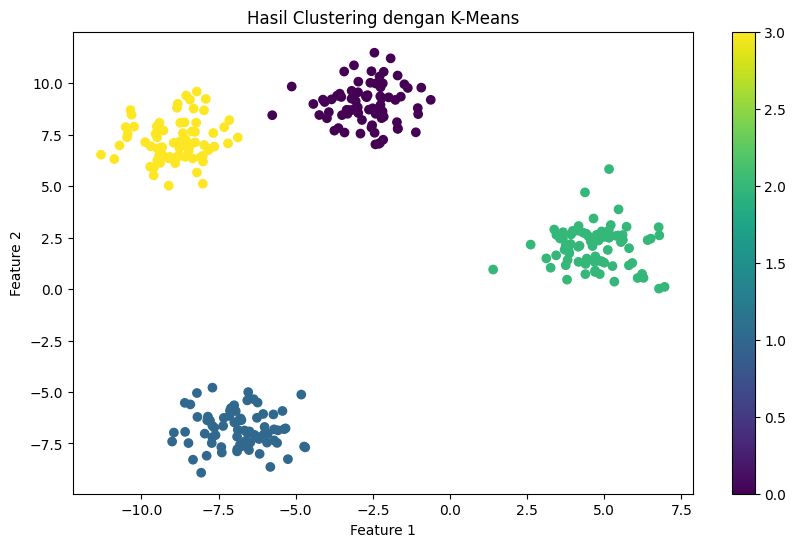

In [68]:
# Membuat dataset clustering
X_cluster, y_cluster = make_blobs(
    n_samples=300,
    n_features=2,
    centers=4,
    cluster_std=1.0,
    random_state=42
)

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_cluster)

# Hitung metrik
silhouette = silhouette_score(X_cluster, cluster_labels)
calinski = calinski_harabasz_score(X_cluster, cluster_labels)

print("Metrik Evaluasi Clustering:")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Score: {calinski:.4f}")

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_cluster[:, 0], X_cluster[:, 1], 
                     c=cluster_labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('Hasil Clustering dengan K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Penjelasan Metrik Clustering

1. **Silhouette Score**
   - Mengukur seberapa mirip suatu objek dengan cluster-nya sendiri dibandingkan dengan cluster lain
   - Rentang nilai dari -1 hingga 1
   - Nilai yang lebih tinggi menunjukkan clustering yang lebih baik
   - Nilai mendekati 0 menunjukkan cluster yang tumpang tindih
   - Nilai negatif menunjukkan kemungkinan salah penempatan data

2. **Calinski-Harabasz Index**
   - Juga dikenal sebagai Variance Ratio Criterion
   - Rasio antara dispersi antar-cluster dan dispersi intra-cluster
   - Nilai yang lebih tinggi menunjukkan clustering yang lebih baik
   - Cocok untuk cluster yang berbentuk convex

3. **Kapan Menggunakan Metrik Apa?**
   - Silhouette Score: Ketika ingin memvalidasi jumlah cluster yang optimal
   - Calinski-Harabasz: Ketika cluster memiliki bentuk spherical
   - Davies-Bouldin: Ketika ingin mengukur rata-rata kemiripan antar cluster

# Kesimpulan

Pemilihan metrik evaluasi yang tepat sangat penting dalam machine learning:

1. **Klasifikasi**
   - Gunakan accuracy untuk dataset seimbang
   - Gunakan precision/recall untuk dataset tidak seimbang
   - F1-score untuk balance antara precision dan recall

2. **Regresi**
   - RMSE ketika error besar harus diberi penalti lebih
   - MAE ketika outlier perlu ditangani dengan lebih baik
   - R² untuk mengukur seberapa baik model menjelaskan variance

3. **Clustering**
   - Silhouette score untuk validasi jumlah cluster
   - Calinski-Harabasz untuk cluster spherical
   - Kombinasikan beberapa metrik untuk evaluasi yang lebih robust

In [69]:
# Contoh praktis: Membandingkan performa model dengan berbagai metrik

# Fungsi untuk menampilkan semua metrik klasifikasi
def display_classification_metrics(y_true, y_pred, title="Metrik Klasifikasi"):
    print(f"\n{title}")
    print("-" * len(title))
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# Membuat dataset tidak seimbang
X_imb, y_imb = make_classification(
    n_samples=1000,
    n_features=20,
    n_classes=2,
    weights=[0.9, 0.1],  # 90% kelas 0, 10% kelas 1
    random_state=42
)

# Split data
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(
    X_imb, y_imb, test_size=0.2, random_state=42
)

# Train model
clf_imb = LogisticRegression(random_state=42)
clf_imb.fit(X_train_imb, y_train_imb)

# Predictions
y_pred_imb = clf_imb.predict(X_test_imb)

# Tampilkan metrik untuk dataset tidak seimbang
display_classification_metrics(y_test_imb, y_pred_imb, 
                            "Metrik Klasifikasi untuk Dataset Tidak Seimbang")


Metrik Klasifikasi untuk Dataset Tidak Seimbang
-----------------------------------------------
Accuracy: 0.8950
Precision: 0.4615
Recall: 0.3000
F1-score: 0.3636

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       180
           1       0.46      0.30      0.36        20

    accuracy                           0.90       200
   macro avg       0.69      0.63      0.65       200
weighted avg       0.88      0.90      0.88       200



# Analisis Hasil Dataset Tidak Seimbang

Dari hasil di atas, kita bisa melihat pentingnya memilih metrik yang tepat untuk dataset tidak seimbang:

1. **Accuracy (0.8950)**
   - Terlihat tinggi karena mayoritas data adalah kelas 0
   - Tidak merepresentasikan performa sebenarnya untuk kelas minoritas
   - Metrik ini menyesatkan untuk dataset tidak seimbang

2. **Precision (0.4615)**
   - Dari semua prediksi positif, hanya 46.15% yang benar
   - Menunjukkan banyak false positive

3. **Recall (0.3000)**
   - Hanya 30% dari kasus positif yang berhasil diidentifikasi
   - Menunjukkan model kesulitan mengenali kelas minoritas

4. **F1-Score (0.3636)**
   - Nilai rendah menunjukkan performa buruk untuk kelas minoritas
   - Balance yang buruk antara precision dan recall

Rekomendasi untuk Dataset Tidak Seimbang:
1. Gunakan teknik resampling (oversampling/undersampling)
2. Gunakan class weights dalam model
3. Fokus pada metrik seperti F1-score atau ROC-AUC
4. Pertimbangkan precision atau recall tergantung konteks bisnis